<a href="https://colab.research.google.com/github/HakureiPOI/llm-explainable-stockrec/blob/main/yfinance_test.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install yfinance pandas_ta

In [2]:
import yfinance as yf
import pandas_ta as ta
import pandas as pd

class StockDataAPI:
    """
    一个用于获取股票数据并计算技术指标的简单 API 类。
    """
    def __init__(self):
        pass

    def get_data(self, ticker: str, period: str = "1y", interval: str = "1d"):
        """
        获取指定股票的历史数据并附加技术指标。

        参数:
            ticker (str): 股票代码 (例如 'AAPL', '600519.SS').
            period (str): 数据周期 (默认为 '1y').
            interval (str): 数据间隔 (默认为 '1d').

        返回:
            pd.DataFrame: 包含 OHLCV 数据和技术指标的 DataFrame。
        """
        print(f"正在获取 {ticker} 的数据...")
        try:
            # 使用 yfinance 获取历史数据
            stock = yf.Ticker(ticker)
            df = stock.history(period=period, interval=interval)

            if df.empty:
                print(f"未找到股票代码: {ticker} 的数据")
                return None

            # 使用 pandas_ta 计算技术指标
            # 简单移动平均线 (SMA)
            df.ta.sma(length=20, append=True) # SMA_20
            df.ta.sma(length=50, append=True) # SMA_50

            # 相对强弱指数 (RSI)
            df.ta.rsi(length=14, append=True) # RSI_14

            # 指数平滑异同移动平均线 (MACD)
            df.ta.macd(fast=12, slow=26, signal=9, append=True) # MACD lines

            # 布林带 (Bollinger Bands)
            df.ta.bbands(length=20, std=2, append=True)

            return df

        except Exception as e:
            print(f"发生错误: {e}")
            return None

# 初始化 API
api = StockDataAPI()
print("StockDataAPI 初始化完成。")

StockDataAPI 初始化完成。


正在获取 AAPL 的数据...

AAPL 的最后 5 行数据：


,Open,High,Low,Close,Volume,Dividends,Stock Splits,SMA_20,SMA_50,RSI_14,MACD_12_26_9,MACDh_12_26_9,MACDs_12_26_9,BBL_20_2.0_2.0,BBM_20_2.0_2.0,BBU_20_2.0_2.0,BBB_20_2.0_2.0,BBP_20_2.0_2.0
Date,,,,,,,,,,,,,,,,,,
2026-01-02 00:00:00-05:00,272.260010,277.839996,269.000000,271.010010,37838100,0.0,0.0,274.815498,272.759640,43.835336,-0.289249,-0.735525,0.446276,268.794217,274.815498,280.836780,4.382054,0.183997
2026-01-05 00:00:00-05:00,270.640015,271.510010,266.140015,267.260010,45647200,0.0,0.0,274.143498,272.940846,36.747433,-0.741217,-0.949995,0.208778,267.891906,274.143498,280.395090,4.560817,-0.050539
2026-01-06 00:00:00-05:00,267.000000,267.549988,262.119995,262.359985,52352100,0.0,0.0,273.322498,273.001474,29.935995,-1.477762,-1.349232,-0.128530,265.515421,273.322498,281.129574,5.712721,-0.202088
2026-01-07 00:00:00-05:00,263.200012,263.679993,259.809998,260.329987,48309800,0.0,0.0,272.444496,272.956764,27.649446,-2.199923,-1.657115,-0.542809,263.018440,272.444496,281.870552,6.919615,-0.142608
2026-01-08 00:00:00-05:00,257.019989,259.290009,255.699997,259.040009,50364100,0.0,0.0,271.537497,272.766571,26.275984,-2.843553,-1.840596,-1.002958,260.652042,271.537497,282.422952,8.017644,-0.074045


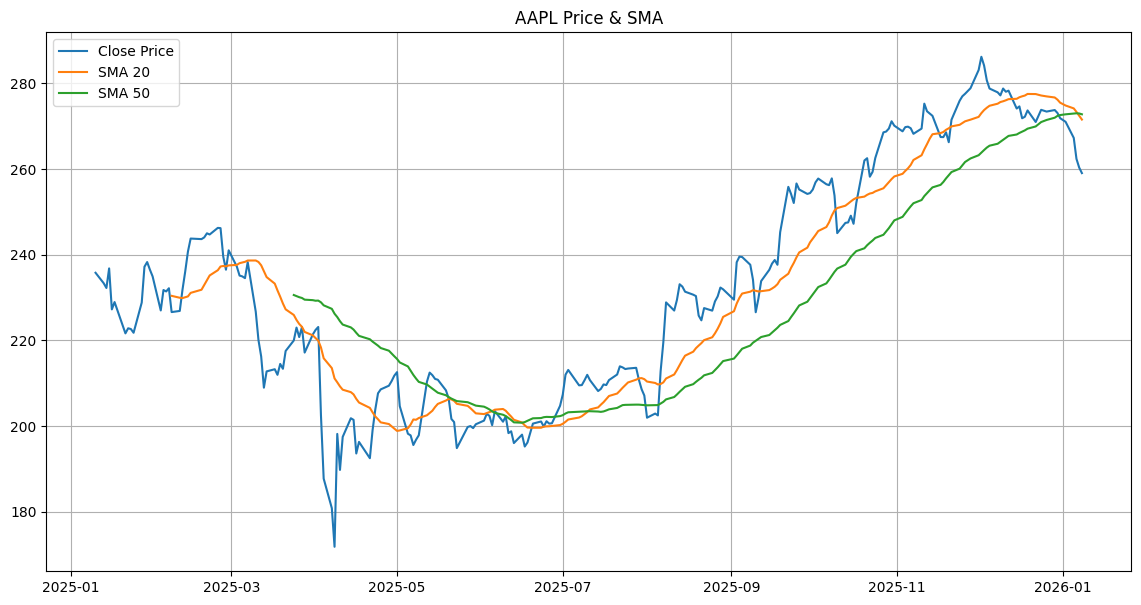

In [3]:
# 示例用法
ticker_symbol = "AAPL" # Apple Inc.
# 对于 A 股，请使用后缀 .SS (上海) 或 .SZ (深圳)，例如 '600519.SS' (贵州茅台)

stock_data = api.get_data(ticker_symbol)

if stock_data is not None:
    print(f"\n{ticker_symbol} 的最后 5 行数据：")
    display(stock_data.tail())

    # 可视化部分数据以验证
    import matplotlib.pyplot as plt

    plt.figure(figsize=(14, 7))
    plt.plot(stock_data.index, stock_data['Close'], label='Close Price')
    plt.plot(stock_data.index, stock_data['SMA_20'], label='SMA 20')
    plt.plot(stock_data.index, stock_data['SMA_50'], label='SMA 50')
    plt.title(f"{ticker_symbol} Price & SMA")
    plt.legend()
    plt.grid(True)
    plt.show()

正在获取 000001.SZ 的数据...

000001.SZ (平安银行) 的最后 5 行数据：


,Open,High,Low,Close,Volume,Dividends,Stock Splits,SMA_20,SMA_50,RSI_14,MACD_12_26_9,MACDh_12_26_9,MACDs_12_26_9,BBL_20_2.0_2.0,BBM_20_2.0_2.0,BBU_20_2.0_2.0,BBB_20_2.0_2.0,BBP_20_2.0_2.0
Date,,,,,,,,,,,,,,,,,,
2026-01-05 00:00:00+08:00,11.42,11.51,11.41,11.50,87549118,0.0,0.0,11.4990,11.5606,48.132010,-0.017258,-0.004487,-0.012771,11.331806,11.4990,11.666194,2.907969,0.502990
2026-01-06 00:00:00+08:00,11.50,11.68,11.48,11.67,130464842,0.0,0.0,11.5060,11.5628,57.188525,-0.003377,0.007515,-0.010892,11.322422,11.5060,11.689579,3.191006,0.946675
2026-01-07 00:00:00+08:00,11.66,11.82,11.62,11.64,96623624,0.0,0.0,11.5120,11.5652,55.351791,0.005144,0.012829,-0.007685,11.318898,11.5120,11.705102,3.354799,0.831431
2026-01-08 00:00:00+08:00,11.64,11.65,11.49,11.51,110008511,0.0,0.0,11.5160,11.5660,48.136946,0.001391,0.007260,-0.005870,11.326774,11.5160,11.705226,3.286310,0.484146
2026-01-09 00:00:00+08:00,11.48,11.53,11.44,11.46,98339004,0.0,0.0,11.5225,11.5674,45.671189,-0.005554,0.000252,-0.005807,11.352191,11.5225,11.692810,2.956120,0.316510


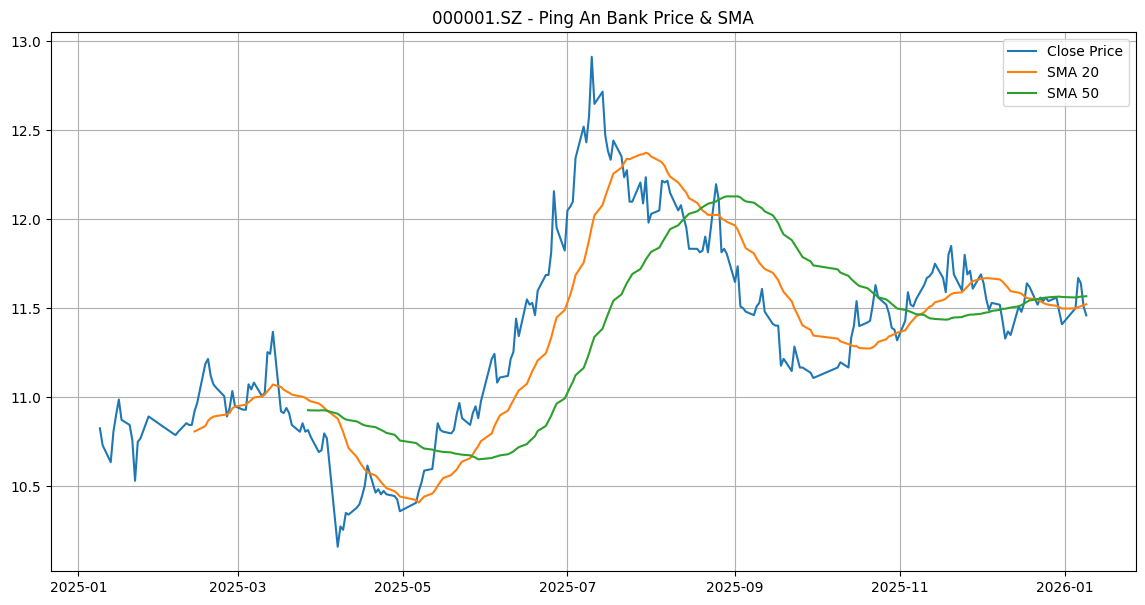

In [5]:
# 获取平安银行 (000001.SZ) 的数据
ticker_symbol = "000001.SZ"

pingan_data = api.get_data(ticker_symbol)

if pingan_data is not None:
    print(f"\n{ticker_symbol} (平安银行) 的最后 5 行数据：")
    display(pingan_data.tail())

    # 可视化
    import matplotlib.pyplot as plt

    plt.figure(figsize=(14, 7))
    plt.plot(pingan_data.index, pingan_data['Close'], label='Close Price')
    plt.plot(pingan_data.index, pingan_data['SMA_20'], label='SMA 20')
    plt.plot(pingan_data.index, pingan_data['SMA_50'], label='SMA 50')
    plt.title(f"{ticker_symbol} - Ping An Bank Price & SMA")
    plt.legend()
    plt.grid(True)
    plt.show()